In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import rc
from sklearn import linear_model

In [2]:
labelsize = 14
figsize = (5, 4.5)
ext = "eps"
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
params = {
    'figure.figsize': figsize,
    'font.size' : 12,
    'axes.labelsize': labelsize,
    'legend.fontsize': 12,
}
plt.rcParams.update(params)
# workdir = 'figures/conduit_flow'
# utils.make_dir_if_missing(workdir)

In [3]:
df = pd.read_csv("~/OneDrive/PhD/Complex Analysis/resistance.csv")

In [4]:
def get_features(df, t_w):
    df_0 = df[np.isclose(df['t/w'], t_w)]
    x = df_0['s/w'].to_numpy()
    x.reshape(-1, 1)
    y = df_0['rtilde'].to_numpy()
    y.reshape(-1, 1)
    x05 = x ** 0.5
    x_1 = x ** (-0.5)
    x2 = x ** 2
    xc = np.cosh(x)
    xs = x ** 2
    # x3 = np.cosh(x)
    x4 = x ** 4
    x5 = x ** 5
    X = np.ones((x.shape[0], 3))
    X[:, 0] = x05
    X[:, 1] = x
    X[:, 2] = x2
    # X[:, 1] = xc
    # X[:, 3] = x3
    return X, y, x

In [5]:
model = linear_model.Ridge(alpha=0.25)

0.9999996793504766 [2.54087916e+00 9.88531258e+01 5.01386941e-02]
0.9999996369618861 [3.04749851e-01 9.86535889e+00 5.76132449e-03]
0.9999750807767865 [0.41496428 0.84528299 0.00543752]
0.9999203373396108 [0.77279596 0.23652054 0.00823713]
0.9999349405095135 [ 1.20625896e+00 -6.74837262e-02 -8.82820434e-04]


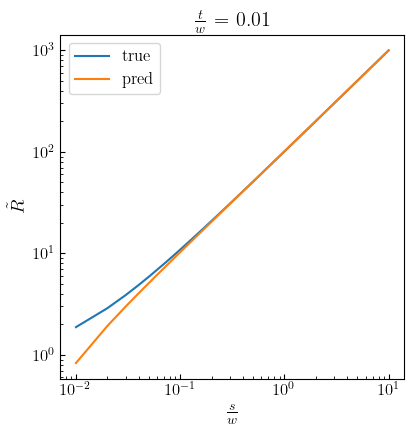

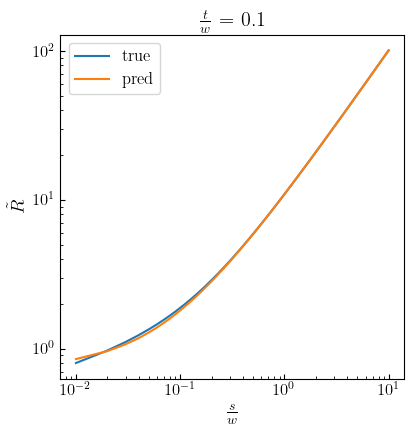

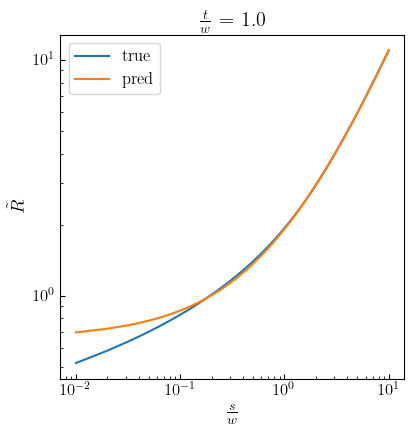

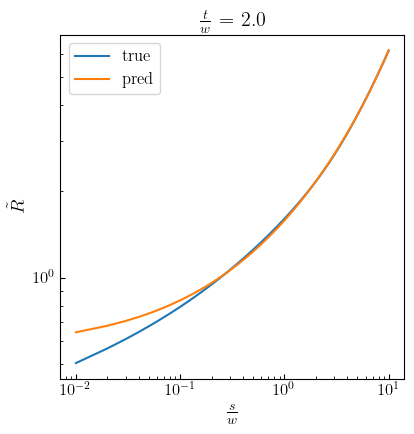

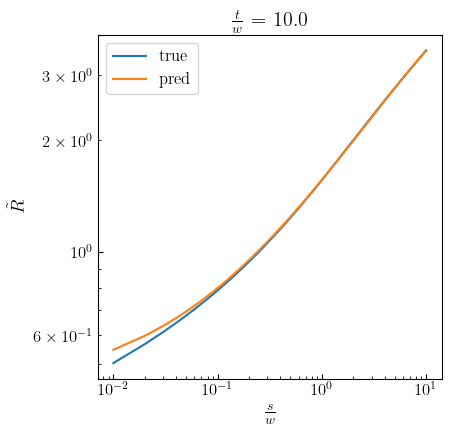

In [8]:
for t_w in [0.01, 0.1, 1.0, 2.0, 10.0]:
    X, y, x = get_features(df, t_w)
    model.fit(X, y)
    print(model.score(X, y), model.coef_)
    yhat = model.predict(X)
    fig, ax = plt.subplots()
    ax.plot(x, y, label='true')
    ax.plot(x, yhat, label='pred')
    ax.legend()#title=r'$\frac{t}{w}$');
    ax.set_box_aspect(1);
    ax.set_xlabel(r'$\frac{s}{w}$');
    ax.set_ylabel(r'$\tilde{R}$');
    ax.minorticks_on();
    ax.tick_params(axis="both", which="both", direction="in")
    ax.semilogx();
    ax.semilogy();
    plt.title(r'$\frac{t}{w}$' + f' = {t_w}')
    plt.tight_layout();